### DSC540 Week 9&10
### Madison Chrsitansen

### Activity 9

In [1]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

In [2]:
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [11]:
url = 'https://www.gutenberg.org/browse/scores/top#authors-last30'
response = requests.get(url)

In [12]:
## function to check web request
def status(r):
    if r.status_code==200:
        print("Check")
        return 1
    else:
        print("Fail")
        return -1
status(response)

Check


1

In [13]:
## html parsing
content = response.content.decode(response.encoding) # decoded 
soup = BeautifulSoup(content, 'html.parser') # pass to BS

In [14]:
## href tags - 'a'
http_links = []
for link in soup.find_all('a'):
    http_links.append(link.get('href'))
    
http_links[:30] # first 30 elements

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [17]:
## regular expression to find numeric digits
file_numb = [] # empty list to hold file numbers
for i in range(19,118):
    link=http_links[i]
    link=link.strip()
    r=re.findall('[0-9]+',link) # regular expression = re, 0-9 = digits in link
    if len(r)==1:
            file_numb.append(int(r[0])) # integer

In [18]:
print("File numbers:", file_numb)

File numbers: [1, 1, 7, 7, 30, 30, 1513, 2701, 2641, 145, 37106, 100, 16389, 67979, 84, 1342, 394, 6761, 2160, 4085, 6593, 1259, 5197, 64317, 11, 20228, 47629, 844, 98, 174, 345, 2542, 43, 70783, 1400, 42108, 2600, 5200, 55, 1080, 70781, 1661, 35899, 70782, 70784, 2554, 76, 1184, 10676, 28054, 25344, 1952, 2591, 15845, 6130, 1260, 4300, 70785, 768, 120, 46, 996, 70777, 4363, 27827, 74, 1232, 2680, 1727, 45, 36, 5740, 30254, 16, 58585, 3206, 13806, 205, 408, 70780, 1399, 1998, 23042, 158, 236, 33283, 2500, 779, 2852, 8800, 135]


In [20]:
## text() to print 2000 characters 
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2023-05-17240261
last 7 days1582660
last 30 days7600516



Top 100 EBooks yesterday
T

In [23]:
## re in extracted text from soup to find titles
titles_temp = []
start = soup.text.splitlines().index("Top 100 EBooks yesterday") # point
for i in range(100):
    titles_temp.append(soup.text.splitlines()[start+i]) # loop 1-100 
    

In [31]:
## only text from string into a list 
## match and span to find indices 
titles = []
for i in range(9,100):
    id_1,id_2 = re.match('^[a-zA-Z ]*', titles_temp[i]).span()
    titles.append(titles_temp[i][id_1:id_2])

In [32]:
for t in titles:
    print(t)


Romeo and Juliet by William Shakespeare 
Moby Dick
A Room with a View by E
Middlemarch by George Eliot 
Little Women
The Complete Works of William Shakespeare by William Shakespeare 
The Enchanted April by Elizabeth Von Arnim 
The Blue Castle
Frankenstein
Pride and Prejudice by Jane Austen 
Cranford by Elizabeth Cleghorn Gaskell 
The Adventures of Ferdinand Count Fathom 
The Expedition of Humphry Clinker by T
The Adventures of Roderick Random by T
History of Tom Jones
Twenty Years After by Alexandre Dumas 
My Life 
The Great Gatsby by F
Alice
Noli Me Tangere by Jos
Ang 
The Importance of Being Earnest
A Tale of Two Cities by Charles Dickens 
The Picture of Dorian Gray by Oscar Wilde 
Dracula by Bram Stoker 
A Doll
The Strange Case of Dr
Uncle Wiggily
Great Expectations by Charles Dickens 
The slang dictionary 
War and Peace by graf Leo Tolstoy 
Metamorphosis by Franz Kafka 
The Wonderful Wizard of Oz by L
A Modest Proposal by Jonathan Swift 
The saddle boys on the plains 
The Adventur

### Activity 10

In [65]:
import urllib.request, urllib.parse, urllib.error
import json
import os

with open('APIkeys.json') as f: # file downloaded and changed to apikeys.json - updated with own apikey
    keys = json.load(f)
    api = keys["OMDBapi"]
    
serviceurl = 'http://www.omdbapi.com/?'
keys = 'f6e9ccfa'+api

In [77]:
## print nicely the movie data from json file
def print_json(json_data):
    # params
    listkeys = ['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language','Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for a in listkeys:
        if a in list(json_data.keys()):
            print(f"{a}: {json_data[a]}")
    print("-"*50)

In [78]:
## download poster of the movie
def poster(json_data):
    title = json_data['Title']
    url = json_data['Poster']
    poster_extension = url.split('.')[-1] 
    poster_data = urllib.request.urlopen(url).read() # reads image from web
    # saving as file
    f = open(filename,'poster')
    f.write(poster_data)
    f.close()

In [75]:
## search_movie function to print the json data and save poster
def search_movie(title):
    try:
        url2 = serviceurl + urllib.parse.urlencode({'t': str(title)})+key
        uh = urllib.request.urlopen(url2)
        data = uh.read()
        json_data = json.loads(data)
        
        if json_data['Response'] == 'True':
            print_json(json_data)

        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [76]:
search_movie("Avatar")

ERROR: Unauthorized


### When following along and a similar code done by the author I kept getting an error as unauthorized. I assume this is due to my API so I checked if it worked with a different method and it did (as shown below). The outcome is not the exact same format but contains the same information. 

### Alternate way to get movie data 

In [72]:
import requests
from pprint import PrettyPrinter
pp = PrettyPrinter()

apiKey = 'f6e9ccfa'

In [80]:
## Checking to see if API works
data_URL = 'http://www.omdbapi.com/?apikey='+apiKey 
year = ''
movie = 'Avatar' 
params = {
    't':movie,
    'type':'movie',
    'y':year,
    'plot':'full'
}
response = requests.get(data_URL,params=params).json()
pp.pprint(response)

{'Actors': 'Sam Worthington, Zoe Saldana, Sigourney Weaver',
 'Awards': 'Won 3 Oscars. 89 wins & 131 nominations total',
 'BoxOffice': '$785,221,649',
 'Country': 'United States',
 'DVD': '22 Apr 2010',
 'Director': 'James Cameron',
 'Genre': 'Action, Adventure, Fantasy',
 'Language': 'English, Spanish',
 'Metascore': '83',
 'Plot': 'When his brother is killed in a robbery, paraplegic Marine Jake '
         'Sully decides to take his place in a mission on the distant world of '
         'Pandora. There he learns of greedy corporate figurehead Parker '
         'Selfridge\'s intentions of driving off the native humanoid "Na\'vi" '
         'in order to mine for the precious material scattered throughout '
         'their rich woodland. In exchange for the spinal surgery that will '
         'fix his legs, Jake gathers knowledge, of the Indigenous Race and '
         'their Culture, for the cooperating military unit spearheaded by '
         'gung-ho Colonel Quaritch, while simultaneousl

### API Simple Pull

In [23]:
import requests
import json

In [24]:
## government website api
## called the denver loacation from the api
result = requests.get('https://developer.nrel.gov/api/alt-fuel-stations/v1/nearest.json?api_key=igwPN4VCRPZQLhP5G4wF1njGB3vAk59sUlplKUIe&location=Denver+CO')

In [25]:
result.status_code # status of api

200

In [26]:
result.text # overview of the info pulled

'{"latitude":39.74001,"longitude":-104.99202,"location_country":"US","precision":{"value":4,"name":"locality","types":["locality","political"]},"station_locator_url":"https://afdc.energy.gov/stations/","total_results":275,"station_counts":{"total":644,"fuels":{"BD":{"total":0},"E85":{"total":2},"ELEC":{"total":635,"stations":{"total":266}},"HY":{"total":0},"LNG":{"total":0},"CNG":{"total":1},"LPG":{"total":6},"RD":{"total":0}}},"offset":0,"fuel_stations":[{"access_code":"private","access_days_time":"Employee use only","access_detail_code":"GOVERNMENT","cards_accepted":null,"date_last_confirmed":"2022-01-10","expected_date":null,"fuel_type_code":"ELEC","groups_with_access_code":"Private - Government only","id":88026,"open_date":"2017-01-01","owner_type_code":"LG","status_code":"E","restricted_access":null,"station_name":"City of Denver - Wellington E Webb Municipal Building","station_phone":null,"updated_at":"2022-02-10T19:42:29Z","facility_type":"MUNI_GOV","geocode_status":"GPS","latit

In [28]:
## The Denver location data subset  
result.json() # data is a readable json format

{'latitude': 39.74001,
 'longitude': -104.99202,
 'location_country': 'US',
 'precision': {'value': 4,
  'name': 'locality',
  'types': ['locality', 'political']},
 'station_locator_url': 'https://afdc.energy.gov/stations/',
 'total_results': 275,
 'station_counts': {'total': 644,
  'fuels': {'BD': {'total': 0},
   'E85': {'total': 2},
   'ELEC': {'total': 635, 'stations': {'total': 266}},
   'HY': {'total': 0},
   'LNG': {'total': 0},
   'CNG': {'total': 1},
   'LPG': {'total': 6},
   'RD': {'total': 0}}},
 'offset': 0,
 'fuel_stations': [{'access_code': 'private',
   'access_days_time': 'Employee use only',
   'access_detail_code': 'GOVERNMENT',
   'cards_accepted': None,
   'date_last_confirmed': '2022-01-10',
   'expected_date': None,
   'fuel_type_code': 'ELEC',
   'groups_with_access_code': 'Private - Government only',
   'id': 88026,
   'open_date': '2017-01-01',
   'owner_type_code': 'LG',
   'status_code': 'E',
   'restricted_access': None,
   'station_name': 'City of Denver -

### Visualizations 

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
## dataset looking at box office data
df = pd.read_csv("/Users/madisonchristiansen/Desktop/Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


<AxesSubplot:>

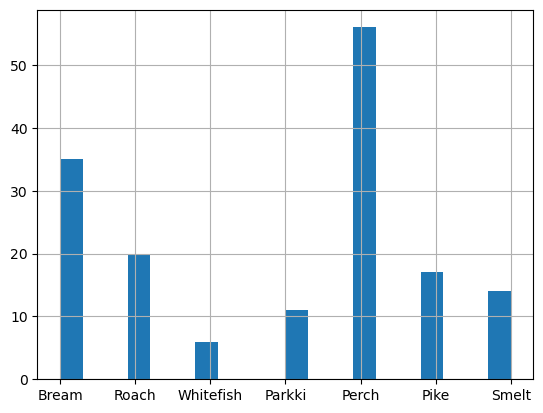

In [48]:
## Histogram 
df['Species'].hist(bins=20)

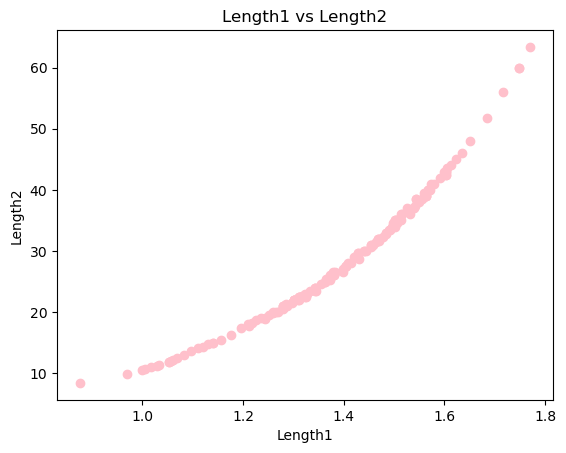

In [49]:
## Scatter Plot
plt.scatter(np.log10(df['Length1']), df['Length2'], c='pink')
plt.title("Length1 vs Length2")
plt.xlabel("Length1")
plt.ylabel("Length2")
plt.show()

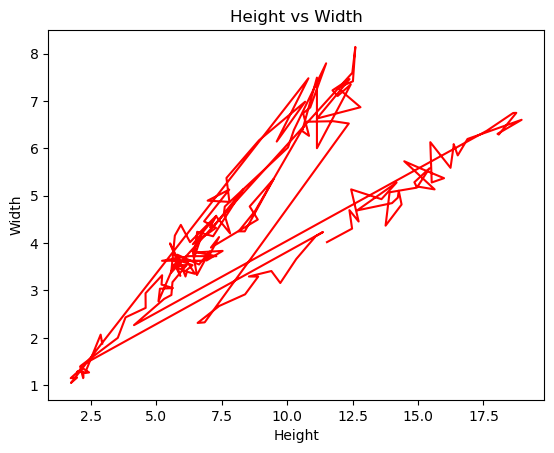

In [51]:
# Line Chart
plt.plot(df['Height'], df['Width'], color='red')
plt.title('Height vs Width')
plt.xlabel('Height')
plt.ylabel('Width')
plt.show()